# Loan Data Exploration
## Pleminary Wrangling
This document explores a  data set containing 113,937 loans with 81 variables on each
loan, including loan amount, borrower rate (or interest rate),
current loan status, borrower income, and many others.

In [204]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [205]:
# load in the dataset into a pandas dataframe, print statistics
Loan = pd.read_csv('prosperLoanData.csv')

In [206]:
# high-level overview of data shape and composition
print(Loan.shape)
print(Loan.dtypes)
print(Loan.head(10))

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   


In [207]:
Loan.sample(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
63793,3B973592939482613042763,981316,2013-11-04 21:17:30.700000000,NaN,36,Current,NaN,0.19144,0.1550,0.1450,...,-24.69,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
2481,2D09342799386764021451B,381793,2008-08-12 16:40:49.120000000,D,36,Chargedoff,2010-01-23 00:00:00,0.26190,0.2390,0.2290,...,-18.58,-27.03,1609.83,1609.83,80.0,1.0,0,0,0.0,52
61829,1F9435544538398099EB63D,624850,2012-08-14 16:16:35.297000000,NaN,36,Current,NaN,0.23121,0.1939,0.1839,...,-48.54,0.00,0.00,0.00,0.0,1.0,0,0,0.0,65
109642,F5E53591264584020B8E207,981471,2013-10-15 09:27:35.880000000,NaN,36,Completed,2014-02-07 00:00:00,0.28544,0.2469,0.2369,...,-24.73,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
22334,49E43592016013078D943D6,986193,2013-10-18 08:26:52.367000000,NaN,36,Current,NaN,0.15833,0.1299,0.1199,...,-81.34,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1


In [208]:
# convert LoanStatus, ListingCategory, and ProsperRating (Alpha) into ordered categorical types
ordinal_var_dict = {'LoanStatus': ['Current','Completed','Chargedoff','Defaulted','Past Due (1-15 days)',
                                  'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)',
                                  'Past Due (16-30 days)','FinalPaymentInProgress','Past Due (>120 days)',
                                  'Cancelled'],
                    'ListingCategory (numeric)': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                    'ProsperRating (Alpha)': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    Loan[var] = Loan[var].astype(ordered_var)

In [209]:
# descriptive statistics for numeric variables
print(Loan.describe())

       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.

### What is the structure of your dataset?
There are 113,937 loans in the dataset with 81 features for each loan (including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others). Most variables are numeric in nature, but the variables LoanStatus, ListingCategory (numeric) and ProsperRating (Alpha)
 are ordered factor variables with the following levels.

LoanStatus:'Current','Completed','Chargedoff','Defaulted','Past Due (1-15 days)',
           'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)',
           'Past Due (16-30 days)','FinalPaymentInProgress','Past Due (>120 days)','Cancelled'
           
ListingCategory (numeric): 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20

ProsperRating (Alpha): 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'

### What is/are the main feature(s) of interest in your dataset?
I'm most interested in figuring out What factors affect a loan’s
outcome status.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect that BorrowerRate will have the strongest effect on each Loan's final status: the higher the BorrowerRate, the more Past Dues we will have. I also think that other characteristics such as BorrowerAPR and Term, will have effects on the Loan Status, though to a much smaller degree than the main effect of BorrowerRate.
### Univariate Exploration
I'll start by looking at the distribution of the main variable of interest: LoanStatus.

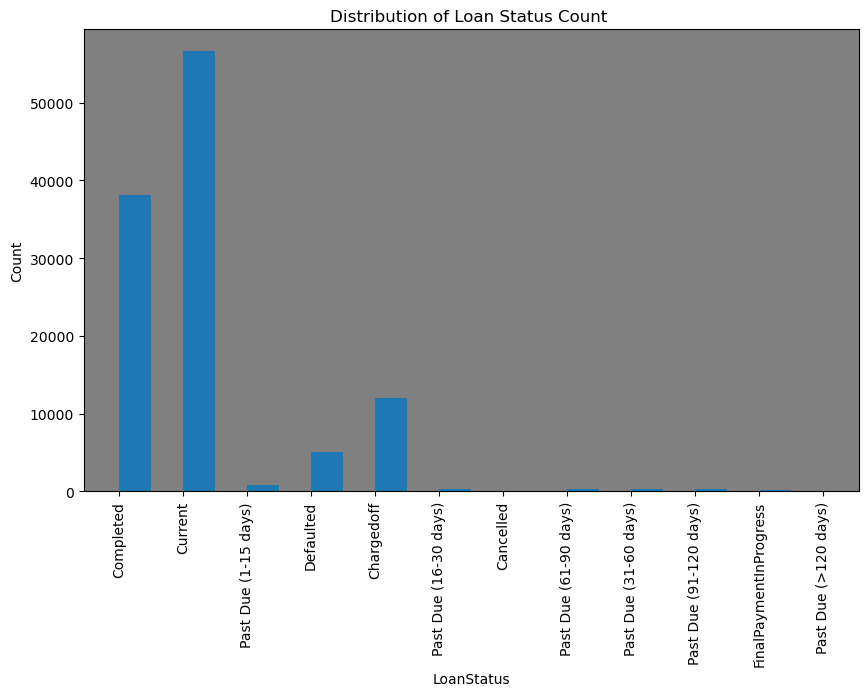

In [210]:
# start with a standard-scaled plot
binsize = 0.01

plt.figure(figsize=[10, 6])
plt.hist(data = Loan, x = 'LoanStatus', bins = 22)
plt.xlabel('LoanStatus')
plt.ylabel('Count')
plt.title("Distribution of Loan Status Count ")
plt.xticks(rotation=90)
plt.show()

LoanStatus has a long-tailed distribution, with a lot of loans being completed and current, and very few being due past 15 days. The distribution looks roughly bimodal, with one peak at the current status, and a second peak a chargedoff.

Next up, the first predictor variable of interest: BorrowerRate.

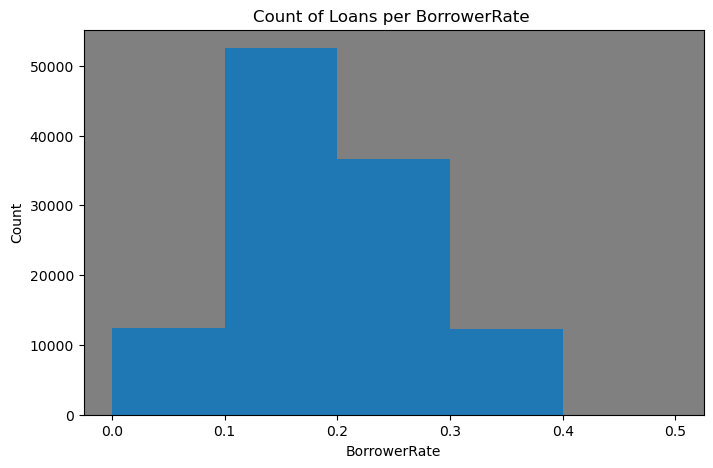

In [212]:
# start with a standard-scaled plot
binsize = 0.1
bins = np.arange(0, Loan['BorrowerRate'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = Loan, x = 'BorrowerRate', bins = bins)
plt.ylabel('Count')
plt.title("Count of Loans per BorrowerRate ")
plt.xlabel('BorrowerRate')
plt.show()

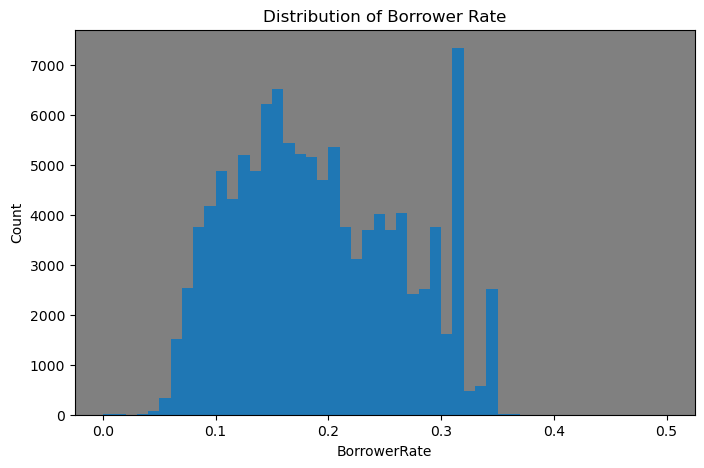

In [213]:
# experimenting with other bins
binsize = 0.01
bins = np.arange(0, Loan['BorrowerRate'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = Loan, x = 'BorrowerRate', bins = bins)
plt.xlabel('BorrowerRate')
plt.ylabel('Count')
plt.title("Distribution of Borrower Rate")
plt.show()

BorrowerRate has a short-tailed distribution, with the fewest loans on the low BorrowerRate end,increasing as the rate increases to the mid BorrowerRate end and then decreasing as the BorrowerRate increases but yet having an exceptionally high count at 0.3 before decreasing again as the rate increases. When plotted on a linear-scale, the Rate distribution looks roughly bimodal, with one peak between 0.1 and 0.2, and a second peak a little above 0.3. Interestingly, there's a steep jump in frequency almost at 0.3, rather than a smooth ramp up.

Next up, the other predictors variable of interest: ProsperScore,Term

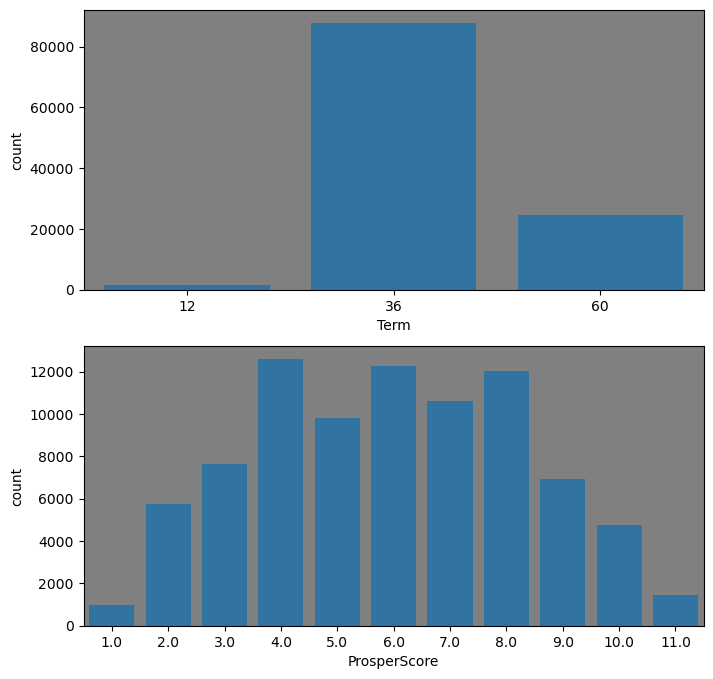

In [216]:
# let's plot all two together to get an idea of each ordinal variable's distribution.
fig, ax = plt.subplots(nrows=2, figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = Loan, x = 'Term', color = default_color, ax = ax[0])
sb.countplot(data = Loan, x = 'ProsperScore', color = default_color, ax = ax[1])

plt.show()

So apparaently, most loan takers are not interested in short term loans. Also, The plot suggests that the most loan takers have a ProsperScore lower than average. Nonetheless a greater proportion of users have a score above 5. Abnormally we notice that some individuals have a score of 11, though the maximum score is said to be 10. This could require our attention further down our analysis. 


In [112]:
Loan.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

### Bivariate Exploration
To start off with, I want to look at the pairwise correlations present between features in the data.

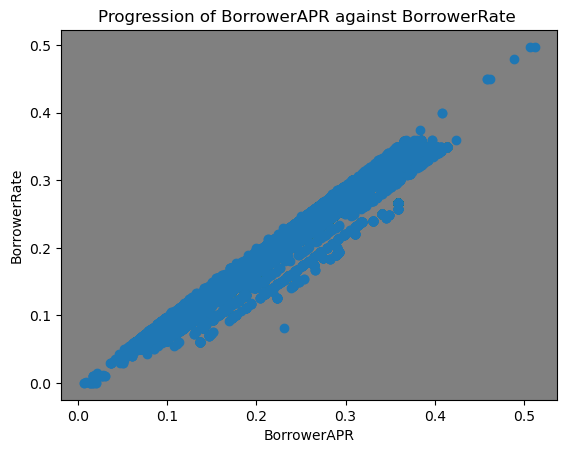

In [218]:
plt.scatter(data=Loan,x='BorrowerAPR', y='BorrowerRate')
plt.ylabel('BorrowerRate')
plt.xlabel('BorrowerAPR')
plt.title("Progression of BorrowerAPR against BorrowerRate ");

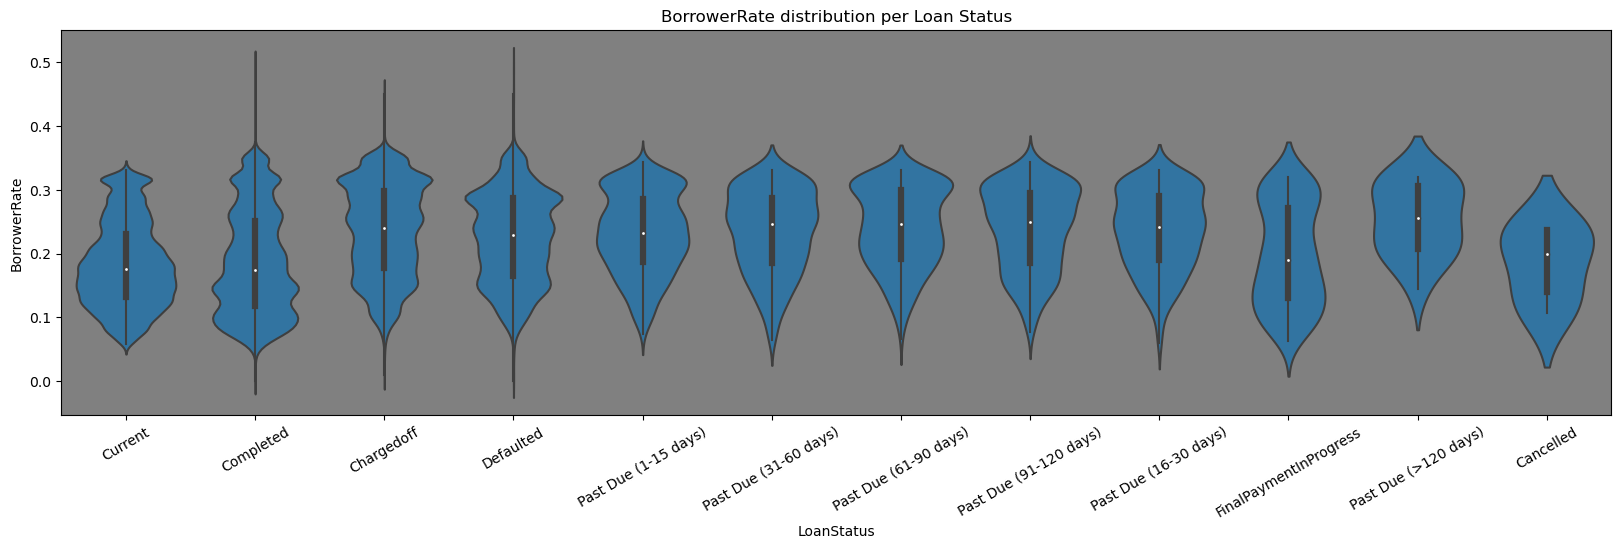

In [203]:
plt.figure(figsize=[20,5])
sb.violinplot(data=Loan, y='BorrowerRate',x='LoanStatus',color = sb.color_palette()[0])
plt.title("BorrowerRate distribution per Loan Status")
plt.xticks(rotation=30);

We see that the overall shape and distribution of the tips are similar for loans with loan status past due. The loans with 'outliers' or abnormally high values values(though a very small proportion) are those marked Completed, chargedoff or defaulted. This tells us that those with really high BorrowerRates either complete their loans, are charged off or defaulted.

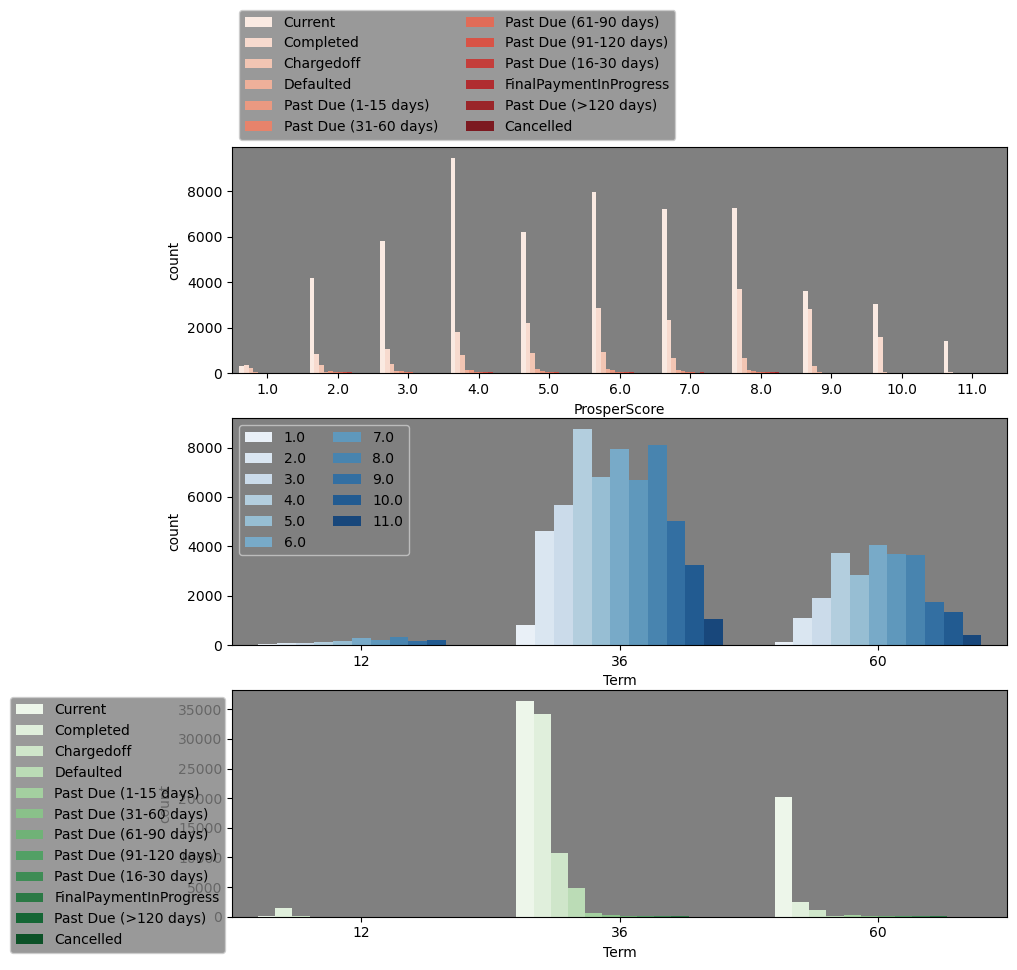

In [221]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [10, 10])
import matplotlib.pyplot as plt
#usin a grey/solid color so that our bars stand out clearly
plt.rcParams['axes.facecolor'] = 'grey'


# subplot 1: ProsperScore vs LoanStatus
plt.subplot(3, 1, 1)
sb.countplot(data = Loan, x = 'ProsperScore', hue = 'LoanStatus', palette = 'Reds')
plt.legend(bbox_to_anchor=(0, 1), loc='lower left', ncol=2)

# subplot 2: ProsperScore vs Term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = Loan, x = 'Term', hue = 'ProsperScore', palette = 'Blues')
ax.legend(ncol = 2)
 # re-arrange legend to reduce overlapping

# subplot 3: Term vs LoanStatus, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = Loan, x = 'Term', hue = 'LoanStatus', palette = 'Greens')
plt.legend(bbox_to_anchor=(0, 1), loc='upper right', ncol=1) # re-arrange legend to remove overlapping

plt.show()

There doesn't seem to be that much interaction between ProsperScore and term, though proportionally it is very obvious that there are more loans with Satus completed and current, irrespective of ProsperScore and Term of Loan. There are slightly larger interactions on the Loan terms and prosper score, especially at the 36 months term. It looks like most scores are average.

With the preliminary look at bivariate relationships out of the way, I want to dig into some of the relationships more. 

### How did the feature(s) of interest vary with other features in the dataset?

LoanStatus revealed to be revelatory when visualised with the violin plot. The loans with 'outliers' are those marked Completed, chargedoff or defaulted. It is highly suggested that the those with really high BorrowerRates either complete their loans to avoid past dues or can't keep up and hence are charged off or defaulted. There doesn't seem to be that much interaction between ProsperScore and LoanStatus since irrespective of the prosperscore, the loan status that dominated were still current, completed and chargedoff. isualising the Term vs LoanStatus plot, it is suggested that most Loans have a term of 36 months. This term holds the greater count for Loans of almost all different status.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Expected relationships were found in the scatterplot showing BorrowerAPR vs BorrowerRate. A strong positive correlation was observed between them, and there is a mild relation between BorrowerRate and LoanStatus(as earlier mentioned , it seems those with really high BorrowerRates either complete their loans to avoid past dues or because they can't keep up; and so are charged off or defaulted), hence an expected relationship as well between BorrowerAPR and LoanStatus. The scatterplot shows that, in general, as BorrowerAPR increases, BorrowerRate increases as well which means the data points have a positive association or relationship.


## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the two numerical measures of borrowerRate and BorrowerAPR play into the relationship between LoanStatus and Term.

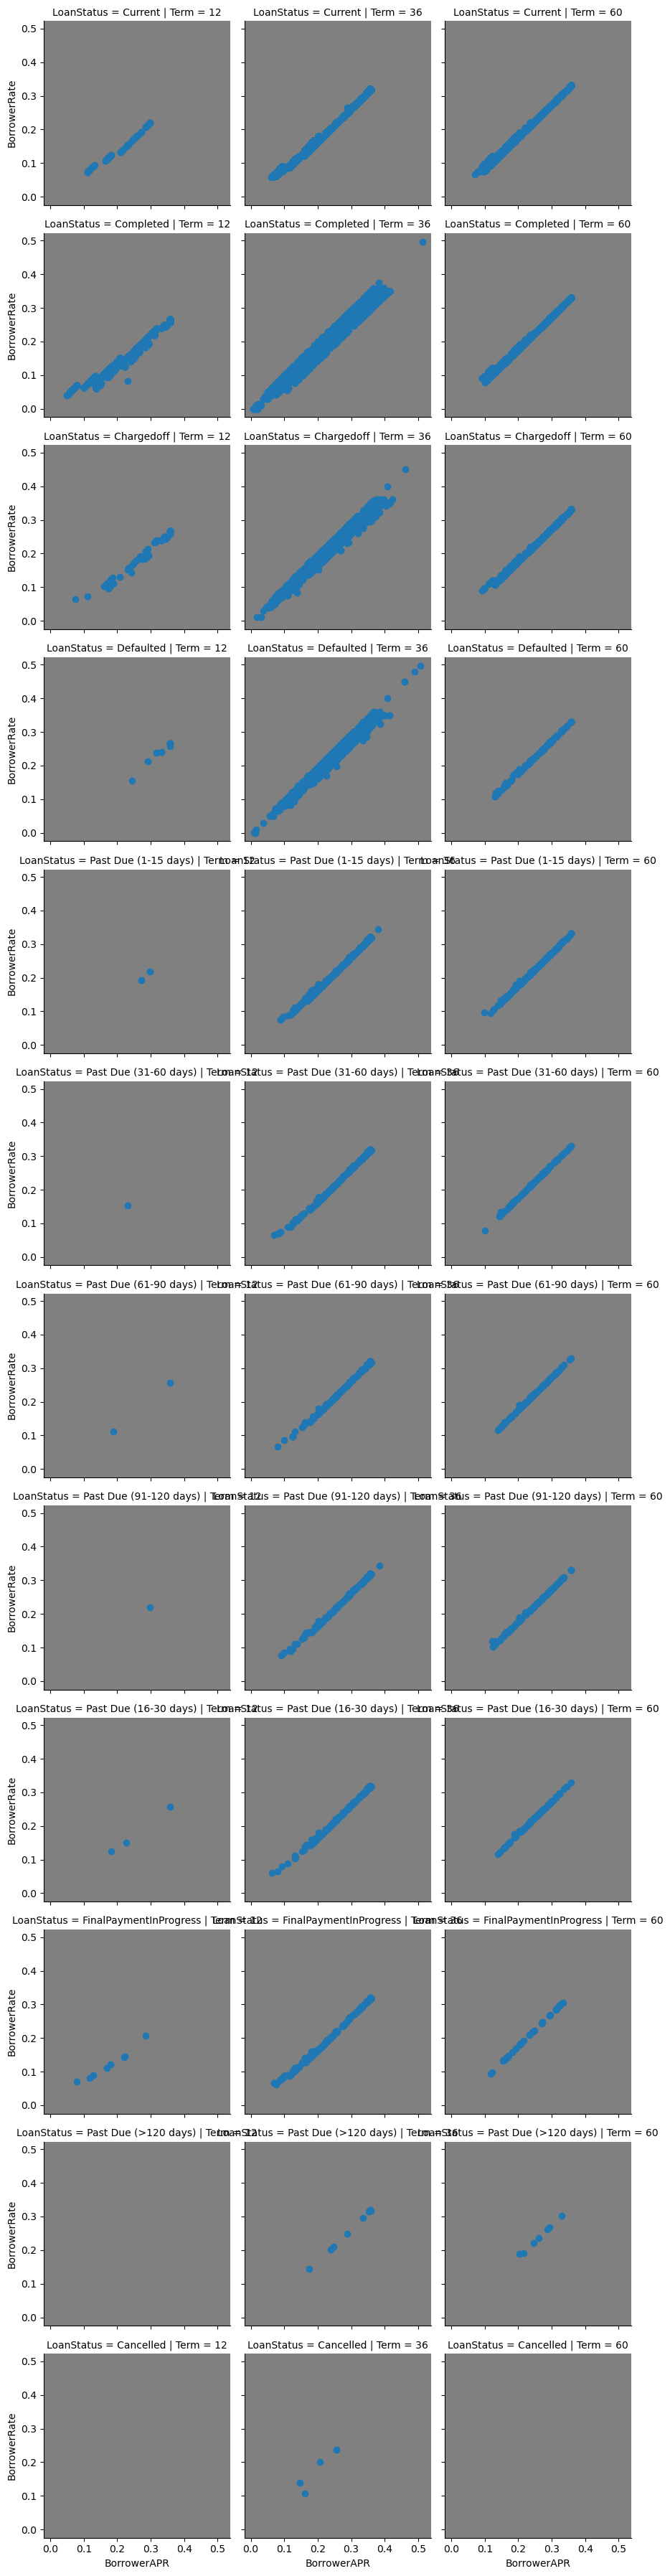

In [201]:
# create faceted heat maps on levels of the cut variable
g = sb.FacetGrid(data = Loan, col = 'Term',row = 'LoanStatus')
g.map(plt.scatter,'BorrowerAPR','BorrowerRate')
g.set_xlabels('BorrowerAPR')
g.set_ylabels('BorrowerRate')

plt.show()

In each of the faceted plots, you can see the relationship of BorrowerRate against BorrowerAPR to varying levels of LoanStatus. As the BorrowerRate increases, the 'cloud' of points moves towards the upper left of the plot, thus showing increased borrowerAPR.